# Solar Data Comparison between Countries


## Intial Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Set seaborn style
sns.set(style="whitegrid")

# Load cleaned data
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# Keep only rows where GHI, DNI, and DHI are all greater than 20
df_all = df_all[(df_all['GHI'] > 20) & (df_all['DNI'] > 20) & (df_all['DHI'] > 20)]



## Boxplots for GHI, DNI, and DHI

C:\Users\Hp\AppData\Local\Temp\ipykernel_96508\303275386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


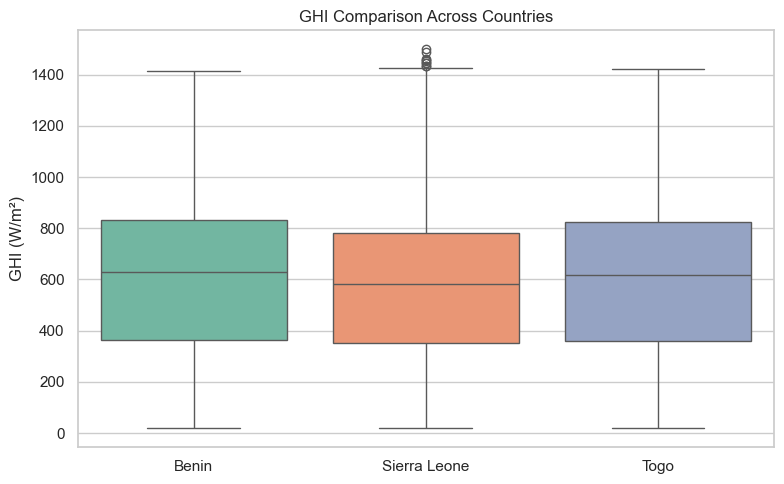

C:\Users\Hp\AppData\Local\Temp\ipykernel_96508\303275386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


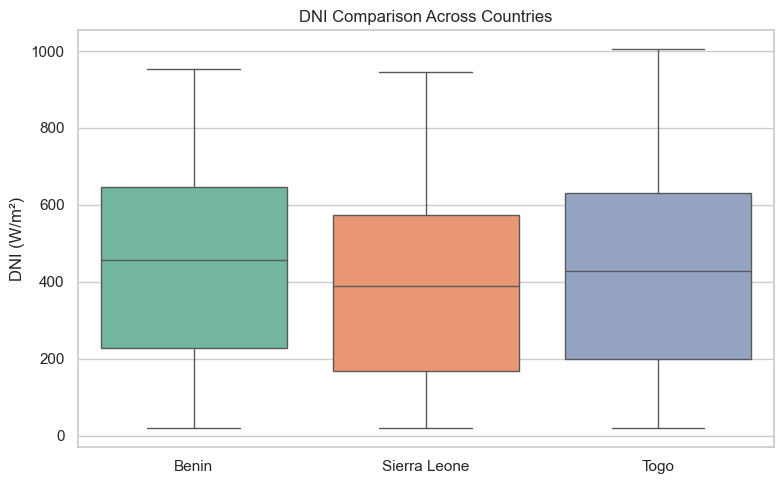

C:\Users\Hp\AppData\Local\Temp\ipykernel_96508\303275386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")


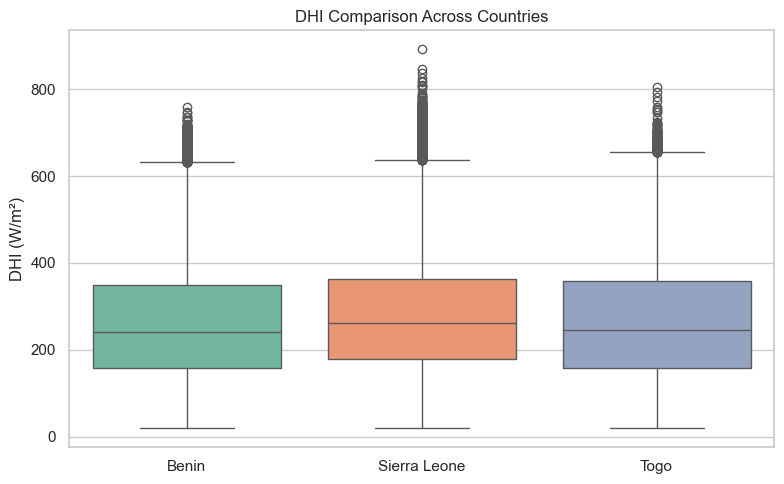

In [3]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette="Set2")
    plt.title(f"{metric} Comparison Across Countries")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()



## Summary Table (Mean, Median, Standard Deviation)

In [4]:
summary_table = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_table


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         591.78  630.4  278.64  440.20  456.4  245.64  263.34  240.2   
Sierra Leone  566.91  583.0  273.63  384.15  388.3  235.54  276.45  262.7   
Togo          586.04  619.0  279.08  421.58  428.5  249.51  265.48  245.2   

                      
                 std  
Country               
Benin         137.85  
Sierra Leone  130.89  
Togo          137.75

## Kruskal-Wallis Test

In [5]:
# Alternative: Kruskal-Wallis Test
kw_stat, kw_p = kruskal(
    benin['GHI'],
    sierra_leone['GHI'],
    togo['GHI']
)
print(f"Kruskal–Wallis p-value (GHI): {kw_p:.5f}")

Kruskal–Wallis p-value (GHI): 0.00000


## Key Observations

### Key Observations

- Benin has the highest **median GHI**, indicating strong solar potential, though with moderate variability.
- Sierra Leone shows **lower GHI on average**, but less variability across observations.
- Kruskal-Wallis test results (p-value = 0.00000) suggest statistically significant differences in solar irradiance across countries.


## Bar Chart Ranking Countries by Average GHI

C:\Users\Hp\AppData\Local\Temp\ipykernel_96508\668897519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


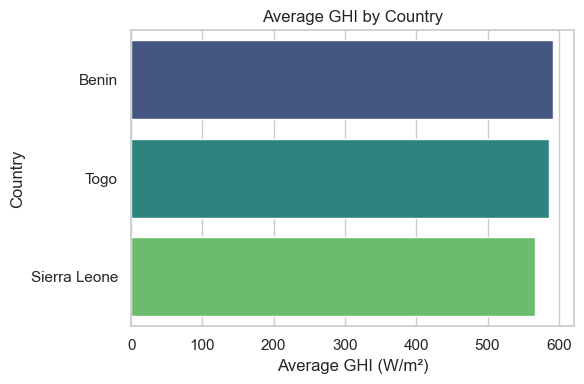

In [6]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.xlabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()
